# <font color='#0489B1'>__AVANCE #4__ </font>

En este avance se centra en la creacion y el analisis del <font color='#B40431'>__grafo de concurrencia de rango 5minutos__ </font>, se recopilan y ordenan avances previos, para un mejor entendimiento. En este documento se encontrará lo siguiente:
- Creacion de los Dataframe de Parejas(Mac_usr) y su peso por cada lugar.
- Creacion de los grafos para los diferentes lugares del Top 4.
- Creacion de dataframes para los diferentes lugares del Top 4.
- Degree Distribution por cada lugar del Top 4.
- Weight Distribution por cada lugar del Top 4.
- Analisis General de cada lugar del Top 4.
- Analisis Especifico por lugar del Top4.
- Analisis del Top 5 Parejas por Lugar del Top4.

# <font color = "#8A0868"> Explicacion del Grafo </font>

El grafo de concurrencia representa la relacion entre los usuarios de un lugar determinado. Se divide el día en franjas de 5 minutos, en cada franja de 5 minutos se toman todos los usarios y se forman parejas entre ellos, por cada repetecion de la pareja en los diferentes intervalos, el contador sube en 1, este contador sera el peso del grafo. 
- <font color = "blue"> __Nodos.-__ </font>  Id del Mac_usr, es decir aqui representamos cada Usuario.
- <font color = "blue"> __Arcos.-__ </font>  Conectarse simultaneamente en el mismo intervalo de 5 minutos.
- <font color = "blue"> __Peso.-__ </font>  Numero de veces que se conectaron simultaneamente ese par de usuarios.

# <font color = "#8A0868"> Importaciones </font>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# <font color = "#8A0868">Carga de los DataFrames</font>

Como se realizara un analisis de las <font color='#B40431'>__conexiones de las parejas de usuarios por cada lugar__ </font>, se procederan a cargar los siguientes datasets:
+ <font color = "blue">dataset_final.csv </font>-> Contiene todas las conexiones registradas
+ <font color = "blue">ma_sitios2.csv </font>-> Contiene la informacion de los sitios donde realizamos el estudio.

## <font color='#DF3A01'> Conexiones </font>

###  <font color = "#FF80E4">&nbsp;Carga </font>  

In [2]:
conexiones = pd.DataFrame.from_csv("dataset_final.csv", sep = ",")
conexiones.head(3)

,datetime,codigo,pauta_id,sitio_id,mac_usr,ip_local,ip_usr,so,navegador,url_ref,tiempo_espera,fabricante-dispositivo
0,2015-05-15 20:16:35,1,11,2,94:01:C2:97:96:CB,10.5.8.1,10.5.10.95,Android,SAFARI,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd"
1,2015-05-15 20:18:15,2,5,2,8C:BF:A6:17:60:A0,10.5.8.1,10.5.9.24,Android,CHROME,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd"
2,2015-05-15 20:18:24,3,19,3,74:AA:FE:A5:7E:90,10.5.0.1,10.5.0.176,Android,CHROME,http://10.5.0.1/status,00:00:00,NaN


### <font color = "FF80E4">&nbsp;Columnas Extras</font> 

In [3]:
conexiones["datetime"] = pd.to_datetime(conexiones["datetime"])
conexiones["mes"] = conexiones["datetime"].dt.month
conexiones["año"] = conexiones["datetime"].dt.year
conexiones["hora"] = conexiones["datetime"].dt.hour
conexiones["fecha"] = conexiones["datetime"].dt.date
conexiones["weekday"] = conexiones["datetime"].dt.weekday
conexiones.head(3)

,datetime,codigo,pauta_id,sitio_id,mac_usr,ip_local,ip_usr,so,navegador,url_ref,tiempo_espera,fabricante-dispositivo,mes,año,hora,fecha,weekday
0,2015-05-15 20:16:35,1,11,2,94:01:C2:97:96:CB,10.5.8.1,10.5.10.95,Android,SAFARI,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd",5,2015,20,2015-05-15,4
1,2015-05-15 20:18:15,2,5,2,8C:BF:A6:17:60:A0,10.5.8.1,10.5.9.24,Android,CHROME,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd",5,2015,20,2015-05-15,4
2,2015-05-15 20:18:24,3,19,3,74:AA:FE:A5:7E:90,10.5.0.1,10.5.0.176,Android,CHROME,http://10.5.0.1/status,00:00:00,NaN,5,2015,20,2015-05-15,4


### <font color = "FF80E4">  &nbsp;Columnas necesarias 

In [4]:
conexionesFinal = conexiones[["datetime","sitio_id", "mac_usr", "so", "navegador", "fabricante-dispositivo", "hora", "weekday", "fecha", "mes", "año"]]
conexionesFinal.head(2)

,datetime,sitio_id,mac_usr,so,navegador,fabricante-dispositivo,hora,weekday,fecha,mes,año
0,2015-05-15 20:16:35,2,94:01:C2:97:96:CB,Android,SAFARI,"Samsung Electronics Co.,Ltd",20,4,2015-05-15,5,2015
1,2015-05-15 20:18:15,2,8C:BF:A6:17:60:A0,Android,CHROME,"Samsung Electronics Co.,Ltd",20,4,2015-05-15,5,2015


## <font color='#DF3A01'> Sitios </font>

###  <font color = "#FF80E4">&nbsp;Carga </font>  

In [5]:
sitios = pd.DataFrame.from_csv("ma_sitios2.csv", sep = ",").reset_index()
sitios.head(3)

,sitio_id,nombre,siglas,ruc,ciudad,nombre_ubicacion,contacto,direccion,email,telefono,...,transparencia,longitud,latitud,ip,puerto,fecha,usuario_modif,bienvenida,formulario,router
0,1,ALBAN BORJA,ALBAN BORJ,920124541001,Guayaquil,Guayaquil,Fabricio Matamoros,Av. Carlos Julio Arosemena,administracion@albanborja.com,923154211,...,0,-2.168677,-79.916769,186.3.137.95,NaN,2016-09-19 13:28:32,fmatamoros,0,0,Mikrotik
1,2,VILLAGE PLAZA,VILLA,0,Guayaquil,Guayaquil,Gabriela,SAMBORONDON,NaN,NaN,...,0,-2.140406,-79.866376,186.3.144.18,NaN,2016-07-20 17:23:50,fmatamoros,0,0,NaN
2,3,CITY MALL,CITY M.,0,Guayaquil,Guayaquil,Gabriela,Alborada,NaN,NaN,...,0,-2.140951,-79.911774,186.3.153.140,NaN,2015-12-22 10:21:54,fmatamoros,0,0,NaN


###  <font color = "#FF80E4">&nbsp;Ubicar por zonas los sitios </font>  

In [6]:
places =[["Urdesa", [[-79.915581,-2.178119], [-79.901204,-2.146938]]],
             ["MallSur", [[-79.902062,-2.232042], [-79.894681,-2.226038]]],
             ["CityMall", [[-79.912663,-2.143936], [-79.905968,-2.137932]]],
             ["AlbanBorja", [[-79.918242,-2.170096], [-79.915066,-2.167523]]],
             ["Samborondon", [[-79.874897,-2.160447], [-79.852066,-2.116704]]],
             ["Aeropuerto", [[-79.886227,-2.152728], [-79.880562,-2.146338]]],
             ["Penias", [[-79.8776014239,-2.1855487464], [-79.873009,-2.175392]]],
             ["Quito", [[-78.586922,-0.395161], [-78.274155,0.021973]]],
             ["CentroConvenciones", [[-79.893479,-2.161755], [-79.883652,-2.154894]]],
             ["HiltonColon", [[-79.8998951912,-2.160929558], [-79.8962903023,-2.1576274229]]],
             ["MallSol", [[-79.8954641819,-2.157053837], [-79.8891341686,-2.1539258197]]],
             ["UniversidadGuayaquil", [[-79.9008607864,-2.1847947751], [-79.8959684372,-2.1791554991]]]]

In [7]:
def localizar(row, places):
    longitud = float(row["longitud"])
    latitud = float(row["latitud"])

    for placeName, ubicacion in places:
        SW, NE= ubicacion
        if (latitud <= NE[0] and longitud <=NE[1] and latitud >= SW[0] and longitud >= SW[1]):
            return placeName
    return "No ubicado"

In [8]:
sitios['localizacion'] = sitios[["longitud", "latitud"]].apply(lambda row: localizar(row, places), axis = 1)
sitios = sitios[["sitio_id","nombre", "longitud", "latitud", "localizacion"]]
sitios.head(3)

,sitio_id,nombre,longitud,latitud,localizacion
0,1,ALBAN BORJA,-2.168677,-79.916769,AlbanBorja
1,2,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon
2,3,CITY MALL,-2.140951,-79.911774,CityMall


## <font color='#DF3A01'> Uniendo conexiones y sitios </font>

In [9]:
datos = pd.merge(conexionesFinal, sitios[["sitio_id","nombre", "longitud", "latitud", "localizacion"]], on = "sitio_id")
datos["hora"] = datos["hora"].apply(lambda x: str(x).rjust(2,"0") + "h")
datos.head(3)

,datetime,sitio_id,mac_usr,so,navegador,fabricante-dispositivo,hora,weekday,fecha,mes,año,nombre,longitud,latitud,localizacion
0,2015-05-15 20:16:35,2,94:01:C2:97:96:CB,Android,SAFARI,"Samsung Electronics Co.,Ltd",20h,4,2015-05-15,5,2015,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon
1,2015-05-15 20:18:15,2,8C:BF:A6:17:60:A0,Android,CHROME,"Samsung Electronics Co.,Ltd",20h,4,2015-05-15,5,2015,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon
2,2015-05-15 20:20:20,2,34:BE:00:05:16:18,Android,SAFARI,"Samsung Electronics Co.,Ltd",20h,4,2015-05-15,5,2015,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon


# <font color = "#8A0868">Analisis General de los lugares</font>

En base al estudio previo se determinó que el <font color = "B40431">__Top 4__ </font>de Lugares en nuestro dataset esta formado por:
<font color ="blue">
 - Aeropuerto
 - Mall del Sur
 - CityMall
 - Centro de Convenciones
</font> 
Se procedera a crear un grafo por cada lugar y un dataframe. Tambien como se uso una clave para identificar a los mac_usr y se encuentra en otro csv se procedera a cargar tambien esa informacion.

## <font color='#DF3A01'> Crear dataframe de nodos </font>

In [10]:
nodos = pd.DataFrame.from_csv("./Nodos/nodos.csv", sep = ",")
nodos.head()

,Mac
id,
1,50:1A:C5:EE:01:07
2,A0:E4:53:EC:30:77
3,94:35:0A:AB:C1:81
4,F4:09:D8:6E:D6:47
5,0C:B3:19:0A:FB:FD


## <font color='#DF3A01'> Crear dataframes y grafos por cada lugar </font>

In [11]:
lugares = {"Aeropuerto":{"archivo": "aeropuertoPeso.csv"},
           "Mall del Sur": {"archivo": "mallsurPeso.csv"},
           "City Mall": {"archivo": "citymallPeso.csv"},
           "Centro de conveciones": {"archivo": "centroconvencionesPeso.csv"}}

In [12]:
for lugar,valor in lugares.items():
    data = pd.DataFrame.from_csv(valor["archivo"], sep = ",").reset_index()
    data = pd.merge(data, nodos.reset_index().rename(columns={'id': 'id', 'Mac': 'Mac_usr1'}), left_on = "Mac1", right_on ="id")
    data = pd.merge(data, nodos.reset_index().rename(columns={'id': 'id', 'Mac': 'Mac_usr2'}), left_on = "Mac2", right_on ="id")
    data = data[["Mac1", "Mac_usr1", "Mac2", "Mac_usr2", "peso"]]
    valor["dataframe"] = data  
    conexiones_file = open(valor["archivo"], 'rb')
    conexiones_file.readline()
    grafo = nx.read_edgelist(conexiones_file, delimiter=',', nodetype=int, data=(('weight',int),))
    conexiones_file.close()
    valor["grafo"] = grafo
    print(lugar, "Terminado")
"Data cargada y grafos creados"

('City Mall', 'Terminado')
('Centro de conveciones', 'Terminado')
('Aeropuerto', 'Terminado')
('Mall del Sur', 'Terminado')


'Data cargada y grafos creados'

## <font color='#DF3A01'> Degree distribution por cada Lugar </font>

In [13]:
for lugar,valor in lugares.items():
    valor["degree"] = valor["grafo"].degree()
    print("Degree de " + lugar + "calculado")
"Completado"

Degree de Aeropuertocalculado
Degree de Mall del Surcalculado
Degree de City Mallcalculado
Degree de Centro de convecionescalculado


'Completado'

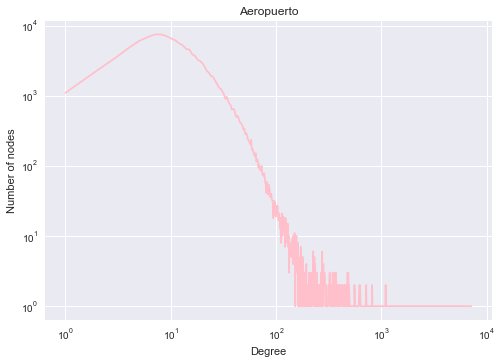

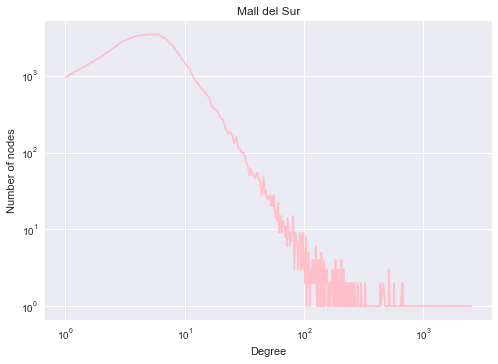

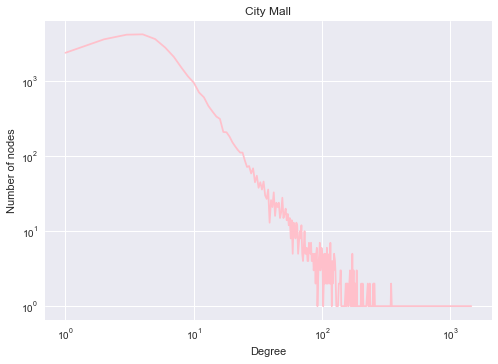

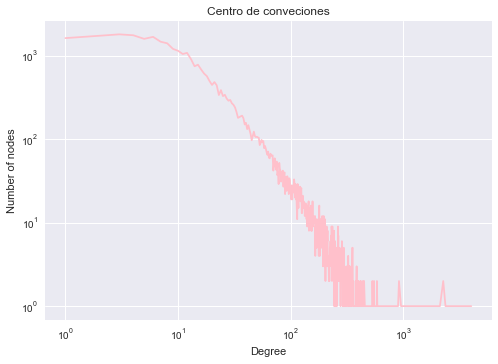

In [14]:
for lugar,valor in lugares.items():
    degrees_lugar = valor["degree"]
    degrees = list(degrees_lugar.values())
    degrees = sorted(set(degrees))
    histogram = [list(degrees_lugar.values()).count(x) for x in degrees]   
    plt.loglog(degrees, histogram, basex=10, basey=10, color ="Pink")
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title(lugar)
    plt.savefig(lugar + "DegreeDistribution.png", dpi=500)
    plt.show()

## <font color='#DF3A01'> Weight Distribution por cada Lugar </font>

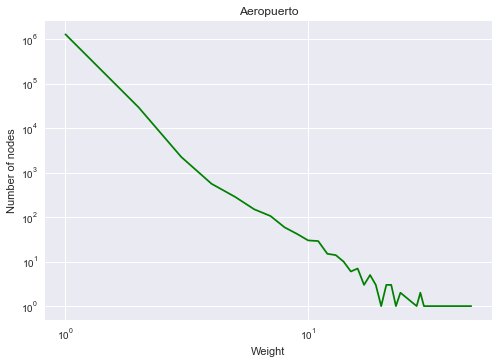

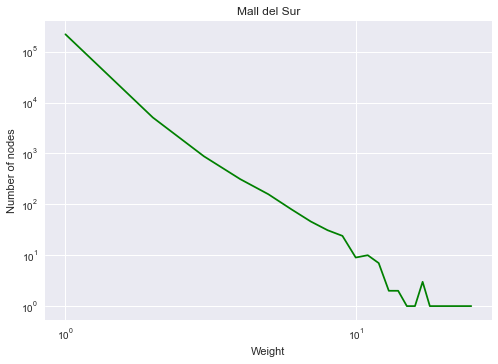

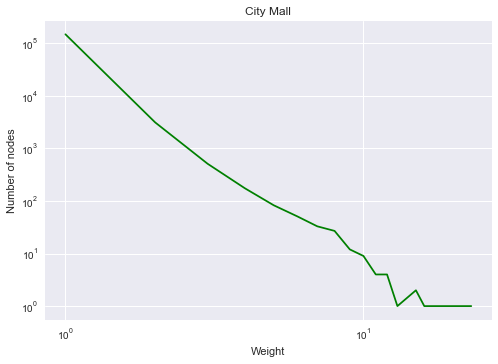

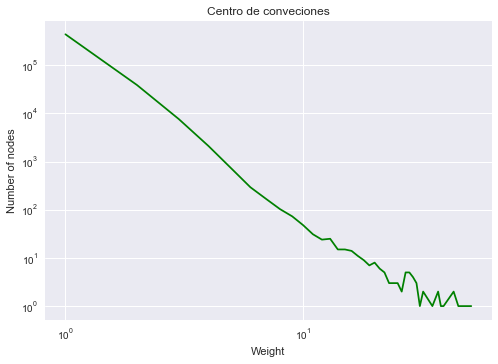

In [15]:
for lugar,valor in lugares.items():
    pesos = list(valor["dataframe"]["peso"])
    pesosC = sorted(set(pesos))
    histogram = [pesos.count(x) for x in pesosC] 
    plt.loglog(pesosC, histogram, basex=10, basey=10, color ="green")
    plt.xlabel('Weight')
    plt.ylabel('Number of nodes')
    plt.title(lugar)
    plt.savefig(lugar + "WeightDistribution.png", dpi=500)
    plt.show()

## <font color='#DF3A01'> Analisis General Degree and Weight por cada Lugar </font>

In [16]:
cortes = [1,10,25,50,100,500,1000,2000,3000,4000,5000,10000]

for lugar,valor in lugares.items():
    dataframe = valor["dataframe"]
    degrees = list(valor["degree"].values())
    pesos = list(dataframe["peso"])
    aux = pd.cut(dataframe["peso"], [ i for i in range(0,max(pesos) +5,5)]).value_counts().reset_index()
    indices = list(aux["index"])
    cantidades = list(aux["peso"])
    aux2 = pd.cut(pd.Series(degrees), [ j for j in cortes if j <= max(degrees) * 2]).value_counts().reset_index()
    indices2 = list(aux2["index"])
    cantidades2 = list(aux2[0])
    print("\n\nAnalisis de", lugar, ":")
    print("\n   + Pesos:", end = " " * 40)
    print("   + Degrees:")
    
    print(("      - Peso Maximo -> " + str(max(pesos))).ljust(51, " "), end="")
    print("      - Degree Maximo ->", max(degrees))
    
    print(("      - Peso Minimo -> " + str(min(pesos))).ljust(51, " "), end="")
    print("      - Degree Minimo ->", min(degrees))
    
    print(("      - Peso Promedio -> " + str(sum(pesos)/len(pesos))).ljust(51, " "), end="")        
    print("      - Degree Promedio ->", sum(degrees)/len(degrees))
    print("\n      - Distribucion de Pesos: ".ljust(51, " "), end="")
    print("      - Distribucion de Degrees: ")
    
    print("            Rango   ->  Cantidad".ljust(50," "), end = "")
    print("             Rango        ->  Cantidad")
    
    for i in range(max([len(aux), len(aux2)])):
        if i >= len(aux):
            print(" ".ljust(50, " "), end= "")
        else:
            print((" "* 11 + str(indices[i]).ljust(9, " ")+ "-> " + str(cantidades[i])).ljust(50, " "), end = "")
        
        if i >= len(aux2):
            print()
        else:
            print(" "* 10, str(indices2[i]).ljust(14, " "), "-> ", cantidades2[i])




Analisis de Aeropuerto :

   + Pesos:                                           + Degrees:
      - Peso Maximo -> 47                                - Degree Maximo -> 7132
      - Peso Minimo -> 1                                 - Degree Minimo -> 1
      - Peso Promedio -> 1.03083443066                   - Degree Promedio -> 19.945234895297588

      - Distribucion de Pesos:                          - Distribucion de Degrees: 
            Rango   ->  Cantidad                               Rango        ->  Cantidad
           (0, 5]   -> 1327728                               (10, 25]       ->  53901
           (5, 10]  -> 387                                   (1, 10]        ->  52123
           (10, 15] -> 74                                    (25, 50]       ->  19863
           (15, 20] -> 19                                    (50, 100]      ->  5038
           (20, 25] -> 9                                     (100, 500]     ->  989
           (25, 30] -> 4                          

# <font color = "#8A0868">Analisis Especifico por lugar</font>

In [17]:
def obtenerAnalisisPesos(usuario, dataframe):
    dataFiltrada = dataframe[np.logical_or(dataframe["Mac1"] == usuario, dataframe["Mac2"] == usuario)]
    aux = list(dataFiltrada["peso"])
    return max(aux), min(aux), sum(aux)/len(aux)

In [18]:
def obtenerAnalisisPesos2(usuario, dataframe):
    dataFiltrada = dataframe[np.logical_or(dataframe["Mac1"] == usuario, dataframe["Mac2"] == usuario)]
    aux = list(dataFiltrada["peso"])
    return max(aux), min(aux), sum(aux)/len(aux),dataFiltrada["peso"].value_counts()

In [19]:
def obtenerInfoUsuarios(lugar, nodos, data):
    archivo = open("usuarios_"+lugar["archivo"], "w")
    archivo.write("usuario|degree|avgPeso|maxPeso|minPeso")
    for usuario, degree in lugar["degree"].items():
        linea = []
        mac_usr = nodos["Mac"][usuario]
        linea += [str(usuario), str(degree)]
        maxP, minP, avgP = obtenerAnalisisPesos(usuario, lugar["dataframe"])
        linea += [str(avgP),str(maxP), str(minP)]
        archivo.write("\n"+ "|".join(linea))
        #aux = data[data["localizacion"].str.lower() == lugar["archivo"][:-3].lower()]
        #dic["#Conexiones"] += [len(aux["mac_usr"] == mac_usr)]
    archivo.close()

In [20]:
def obtenerTopAmigos(usuario, dataframe, n):
    amigos = []
    aux1 = dataframe[dataframe["Mac1"] == usuario]
    usuarios = list(aux1["Mac2"])
    pesos = list(aux1["peso"])
    amigos += [(usuarios[i], pesos[i]) for i in range(len(usuarios))]
    aux2 = dataframe[dataframe["Mac2"] == usuario]
    usuarios = list(aux2["Mac2"])
    pesos = list(aux2["peso"])
    amigos += [(usuarios[i], pesos[i]) for i in range(len(usuarios))]
    amigos.sort(key=lambda x: x[1], reverse=True)
    return amigos[:n]
    

## <font color='#DF3A01'> Aeropuerto </font>

In [21]:
aeropuerto = lugares["Aeropuerto"]

###  <font color = "#FF80E4">&nbsp;Usuarios del Aeropuerto </font>  

In [22]:
#obtenerInfoUsuarios(aeropuerto, nodos, datos)
"Terminado"

'Terminado'

In [50]:
usuariosAero = pd.DataFrame.from_csv("usuarios_aeropuertoPeso.csv", sep = "|")
usuariosAero.head()

,degree,avgPeso,maxPeso,minPeso
usuario,,,,
426,6218,1.196365,47,1
638,5938,1.178006,47,1
149,4457,1.205519,31,1
697,2888,1.158934,30,1
113,5148,1.148213,30,1


###  <font color = "#FF80E4">&nbsp;Plot de Usuarios del Aeropuerto </font>  

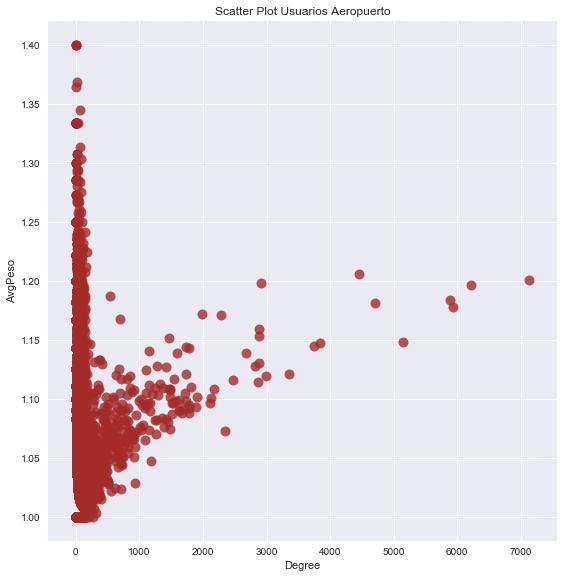

In [51]:
sns.lmplot(y='avgPeso', x='degree',
           data=usuariosAero,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100, "color": "brown"},size=8)
plt.title('Scatter Plot Usuarios Aeropuerto')
plt.xlabel('Degree')
plt.ylabel('AvgPeso')
plt.show()

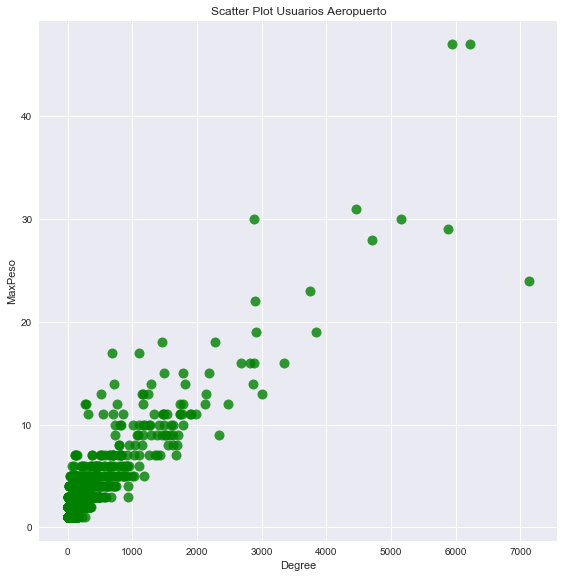

In [60]:
sns.lmplot(y='maxPeso', x='degree',
           data=usuariosAero,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100, "color": "green"},size=8)
plt.title("Scatter Plot Usuarios Aeropuerto")
plt.xlabel('Degree')
plt.ylabel('MaxPeso')
plt.show()

###  <font color = "#FF80E4">&nbsp;Analisis de Top 5 Usuarios del Aeropuerto </font>  

In [53]:
items_aeropuerto = list(aeropuerto["degree"].items())
items_aeropuerto.sort(key=lambda x: x[1], reverse=True)

for mac_id,degree in items_aeropuerto[:5]:
    mac_usr = nodos["Mac"][mac_id]
    print("\n\nAnalisis del Usuario", mac_usr)
    print("  + Degree:", degree)
    maxP, minP, avgP, value = obtenerAnalisisPesos2(mac_id, aeropuerto["dataframe"])
    print("  + Maximo Peso:",maxP)
    print("  + Minimo Peso:",minP)
    print("  + Peso Promedio:",avgP)
    print("\n  + Analisis Pesos:")
    value = value.reset_index()
    aux1= list(value["index"])
    aux2= list(value["peso"])
    print("     Peso    #NumVeces")
    for i in range(len(aux1)):
        print("     ",str(aux1[i]).ljust(3, ' '), "    ", aux2[i])
    print("\n  + Analisis Top10 usuarios con el que más se conecta")
    amigos = obtenerTopAmigos(mac_id, aeropuerto["dataframe"], 10)
    print(amigos)
    #print(" + Degree: ",degree)
    #print(" + Max Peso: ",)



Analisis del Usuario 24:E3:14:85:4D:79
  + Degree: 7132
  + Maximo Peso: 24
  + Minimo Peso: 1
  + Peso Promedio: 1.20064498037

  + Analisis Pesos:
     Peso    #NumVeces
      1        6342
      2        583
      3        100
      4        37
      5        20
      7        14
      6        8
      10       5
      8        4
      11       3
      15       3
      9        3
      12       2
      19       2
      24       1
      20       1
      16       1
      21       1
      14       1
      17       1

  + Analisis Top10 usuarios con el que más se conecta
[(426, 24), (320, 21), (149, 20), (638, 19), (254, 19), (813, 17), (271, 16), (291, 15), (582, 15), (6840, 15)]


Analisis del Usuario 2C:D0:5A:72:6D:AA
  + Degree: 6218
  + Maximo Peso: 47
  + Minimo Peso: 1
  + Peso Promedio: 1.1963653908

  + Analisis Pesos:
     Peso    #NumVeces
      1        5708
      2        332
      3        69
      4        29
      5        24
      6        16
      7        10
      8

## <font color='#DF3A01'> Mall del Sur </font>

In [28]:
mallSur = lugares["Mall del Sur"]

###  <font color = "#FF80E4">&nbsp;Usuarios del Mall del Sur </font>  

In [29]:
#obtenerInfoUsuarios(mallSur, nodos, datos)
"Terminado"

'Terminado'

In [54]:
usuariosSur = pd.DataFrame.from_csv("usuarios_mallSurPeso.csv", sep = "|")
usuariosSur.head()

,degree,avgPeso,maxPeso,minPeso
usuario,,,,
200574,2528,1.292326,25,1
200631,2485,1.308249,25,1
202117,1407,1.248045,22,1
208351,1726,1.292005,18,1
203345,1094,1.255941,17,1


###  <font color = "#FF80E4">&nbsp;Plot de Usuarios del Mall del Sur</font>  

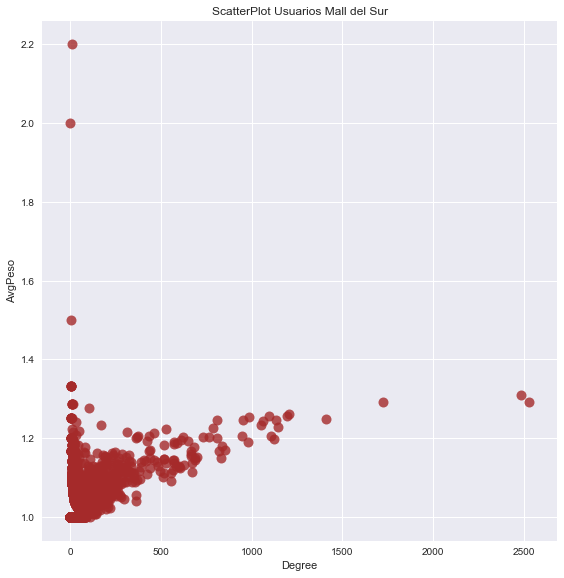

In [55]:
sns.lmplot(y='avgPeso', x='degree',
           data=usuariosSur,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100, "color":"brown"},size=8)
plt.title('ScatterPlot Usuarios Mall del Sur')
plt.xlabel('Degree')
plt.ylabel('AvgPeso')
plt.show()

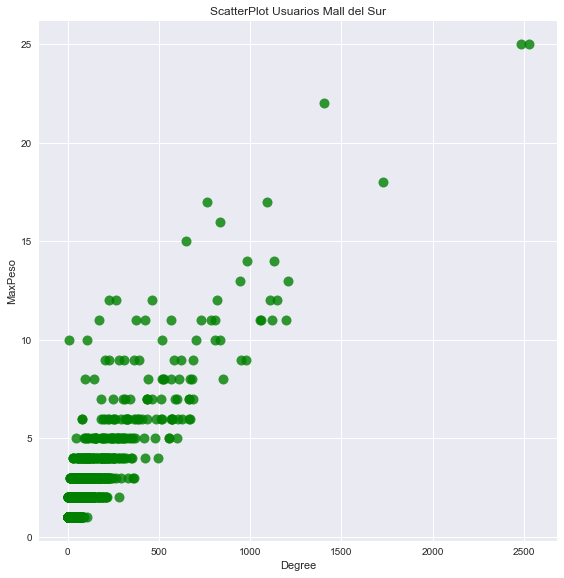

In [61]:
sns.lmplot(y='maxPeso', x='degree',
           data=usuariosSur,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100, "color": "green"},size=8)
plt.title('ScatterPlot Usuarios Mall del Sur')
plt.xlabel('Degree')
plt.ylabel('MaxPeso')
plt.show()

###  <font color = "#FF80E4">&nbsp;Analisis de Top 5 Usuarios del Mall del Sur </font>  

In [65]:
items_sur = list(mallSur["degree"].items())
items_sur.sort(key=lambda x: x[1], reverse=True)

for mac_id,degree in items_sur[:5]:
    mac_usr = nodos["Mac"][mac_id]
    print("\n\nAnalisis del Usuario", mac_usr)
    print("  + Degree:", degree)
    maxP, minP, avgP, value = obtenerAnalisisPesos2(mac_id, mallSur["dataframe"])
    print("  + Maximo Peso:",maxP)
    print("  + Minimo Peso:",minP)
    print("  + Peso Promedio:",avgP)
    print("\n  + Analisis Pesos:")
    value = value.reset_index()
    aux1= list(value["index"])
    aux2= list(value["peso"])
    print("     Peso    #NumVeces")
    for i in range(len(aux1)):
        print("     ",str(aux1[i]).ljust(3, ' '), "    ", aux2[i])
    print("\n  + Analisis Top10 usuarios con el que más se conecta")
    amigos = obtenerTopAmigos(mac_id, mallSur["dataframe"], 10)
    print(amigos)
    #print(" + Degree: ",degree)
    #print(" + Max Peso: ",)



Analisis del Usuario 24:69:A5:9B:D4:BC
  + Degree: 2528
  + Maximo Peso: 25
  + Minimo Peso: 1
  + Peso Promedio: 1.29232594937

  + Analisis Pesos:
     Peso    #NumVeces
      1        2214
      2        175
      3        55
      4        31
      5        19
      6        9
      7        7
      11       4
      8        4
      9        3
      13       1
      17       1
      22       1
      14       1
      12       1
      10       1
      25       1

  + Analisis Top10 usuarios con el que más se conecta
[(200631, 25), (202117, 22), (208351, 17), (200597, 14), (219891, 13), (206494, 12), (183360, 11), (200718, 11), (205929, 11), (201076, 11)]


Analisis del Usuario C8:14:79:A7:85:EF
  + Degree: 2485
  + Maximo Peso: 25
  + Minimo Peso: 1
  + Peso Promedio: 1.30824949698

  + Analisis Pesos:
     Peso    #NumVeces
      1        2169
      2        200
      3        42
      4        19
      5        15
      7        8
      8        8
      9        5
      6        

## <font color='#DF3A01'> City Mall </font>

In [34]:
cityMall = lugares["City Mall"]

###  <font color = "#FF80E4">&nbsp;Usuarios del CityMall</font>  

In [44]:
#obtenerInfoUsuarios(cityMall, nodos, datos)
"Terminado"

'Terminado'

In [57]:
usuariosCity = pd.DataFrame.from_csv("usuarios_cityMallPeso.csv", sep = "|")
usuariosCity.head()

,degree,avgPeso,maxPeso,minPeso
usuario,,,,
175325,623,1.293740,23,1
187377,528,1.352273,23,1
169365,943,1.268293,17,1
186386,954,1.229560,17,1
169729,1420,1.298592,16,1


###  <font color = "#FF80E4">&nbsp;Plot de Usuarios del CityMall</font>  

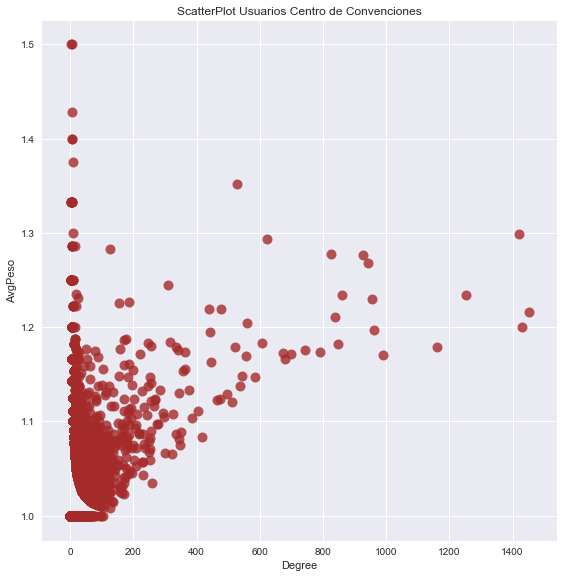

In [78]:
sns.lmplot(y='avgPeso', x='degree',
           data=usuariosCity,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100, "color":"brown"},size=8)
plt.title('ScatterPlot Usuarios Centro de Convenciones')
plt.xlabel('Degree')
plt.ylabel('AvgPeso')
plt.show()

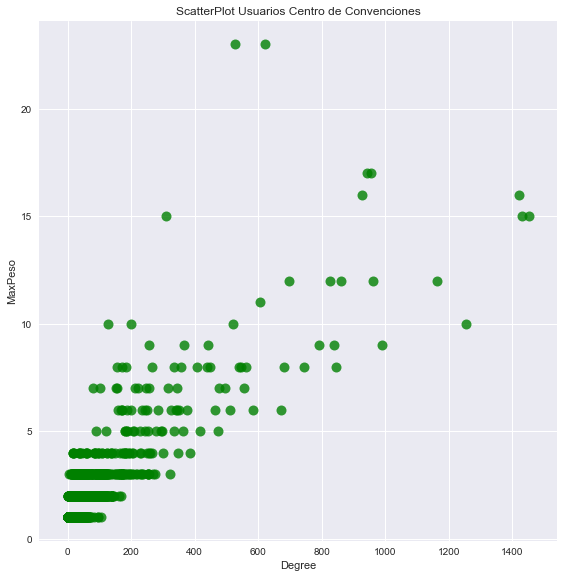

In [77]:
sns.lmplot(y='maxPeso', x='degree',
           data=usuariosCity,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100, "color": "green"},size=8)
plt.title("ScatterPlot Usuarios Centro de Convenciones")
plt.xlabel('Degree')
plt.ylabel('MaxPeso')
plt.show()

###  <font color = "#FF80E4">&nbsp;Analisis de Top 5 Usuarios del CityMall </font>  

In [66]:
items_city = list(cityMall["degree"].items())
items_city.sort(key=lambda x: x[1], reverse=True)

for mac_id,degree in items_city[:5]:
    mac_usr = nodos["Mac"][mac_id]
    print("\n\nAnalisis del Usuario", mac_usr)
    print("  + Degree:", degree)
    maxP, minP, avgP, value = obtenerAnalisisPesos2(mac_id, cityMall["dataframe"])
    print("  + Maximo Peso:",maxP)
    print("  + Minimo Peso:",minP)
    print("  + Peso Promedio:",avgP)
    print("\n  + Analisis Pesos:")
    value = value.reset_index()
    aux1= list(value["index"])
    aux2= list(value["peso"])
    print("     Peso    #NumVeces")
    for i in range(len(aux1)):
        print("     ",str(aux1[i]).ljust(3, ' '), "    ", aux2[i])
    print("\n  + Analisis Top10 usuarios con el que más se conecta")
    amigos = obtenerTopAmigos(mac_id, cityMall["dataframe"], 10)
    print(amigos)
    #print(" + Degree: ",degree)
    #print(" + Max Peso: ",)



Analisis del Usuario 84:63:D6:22:63:58
  + Degree: 1452
  + Maximo Peso: 15
  + Minimo Peso: 1
  + Peso Promedio: 1.21625344353

  + Analisis Pesos:
     Peso    #NumVeces
      1        1297
      2        90
      3        30
      4        14
      5        8
      6        5
      8        4
      15       1
      10       1
      9        1
      7        1

  + Analisis Top10 usuarios con el que más se conecta
[(170993, 15), (169729, 10), (170993, 9), (178468, 8), (170993, 8), (170993, 8), (170993, 8), (170993, 7), (170096, 6), (169023, 6)]


Analisis del Usuario 30:A8:DB:1C:5E:B0
  + Degree: 1429
  + Maximo Peso: 15
  + Minimo Peso: 1
  + Peso Promedio: 1.20013995801

  + Analisis Pesos:
     Peso    #NumVeces
      1        1288
      2        93
      3        17
      4        9
      7        6
      5        6
      8        4
      6        4
      15       1
      11       1

  + Analisis Top10 usuarios con el que más se conecta
[(170993, 15), (186386, 11), (170096, 8),

## <font color='#DF3A01'> Centro de Convenciones </font>

In [72]:
centroConv = lugares["Centro de conveciones"]

###  <font color = "#FF80E4">&nbsp;Usuarios del Centro de Convenciones</font>  

In [70]:
#obtenerInfoUsuarios(centroConv, nodos, datos)
"Terminado"

'Terminado'

In [73]:
usuariosCentro = pd.DataFrame.from_csv("usuarios_centroConvencionesPeso.csv", sep = "|")
usuariosCentro.head()

,degree,avgPeso,maxPeso,minPeso
usuario,,,,
139639,1246,1.823435,51,1
137703,2253,1.701287,51,1
41931,2359,1.437050,45,1
137498,3992,1.548096,45,1
137425,2253,1.525965,43,1


###  <font color = "#FF80E4">&nbsp;Plot de Usuarios del Centro de Convenciones</font>  

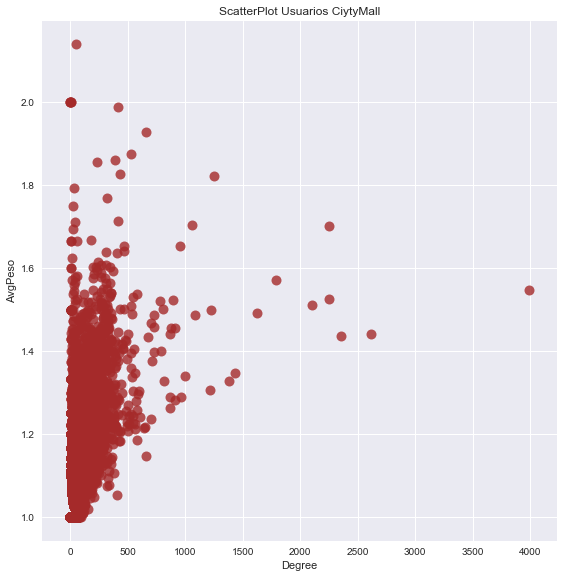

In [74]:
sns.lmplot(y='avgPeso', x='degree',
           data=usuariosCentro,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100, "color":"brown"},size=8)
plt.title('ScatterPlot Usuarios CiytyMall')
plt.xlabel('Degree')
plt.ylabel('AvgPeso')
plt.show()

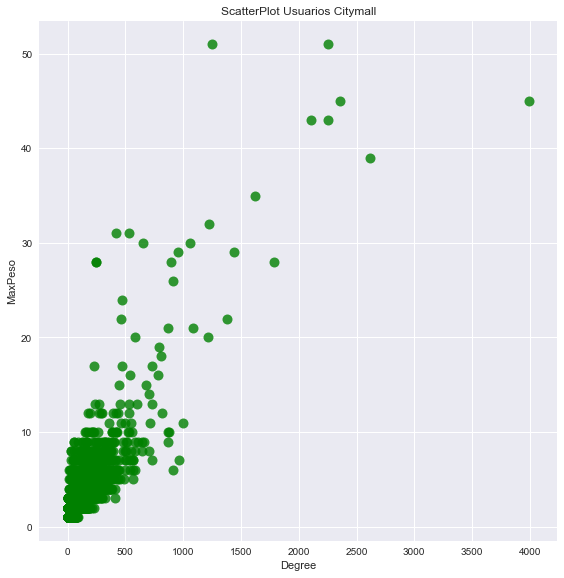

In [75]:
sns.lmplot(y='maxPeso', x='degree',
           data=usuariosCentro,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100, "color": "green"},size=8)
plt.title("ScatterPlot Usuarios Citymall")
plt.xlabel('Degree')
plt.ylabel('MaxPeso')
plt.show()

###  <font color = "#FF80E4">&nbsp;Analisis de Top 5 Usuarios del Centro de Convenciones </font>  

In [76]:
items_city = list(centroConv["degree"].items())
items_city.sort(key=lambda x: x[1], reverse=True)

for mac_id,degree in items_city[:5]:
    mac_usr = nodos["Mac"][mac_id]
    print("\n\nAnalisis del Usuario", mac_usr)
    print("  + Degree:", degree)
    maxP, minP, avgP, value = obtenerAnalisisPesos2(mac_id, centroConv["dataframe"])
    print("  + Maximo Peso:",maxP)
    print("  + Minimo Peso:",minP)
    print("  + Peso Promedio:",avgP)
    print("\n  + Analisis Pesos:")
    value = value.reset_index()
    aux1= list(value["index"])
    aux2= list(value["peso"])
    print("     Peso    #NumVeces")
    for i in range(len(aux1)):
        print("     ",str(aux1[i]).ljust(3, ' '), "    ", aux2[i])
    print("\n  + Analisis Top10 usuarios con el que más se conecta")
    amigos = obtenerTopAmigos(mac_id, centroConv["dataframe"], 10)
    print(amigos)
    #print(" + Degree: ",degree)
    #print(" + Max Peso: ",)



Analisis del Usuario EC:59:E7:EF:95:16
  + Degree: 3992
  + Maximo Peso: 45
  + Minimo Peso: 1
  + Peso Promedio: 1.54809619238

  + Analisis Pesos:
     Peso    #NumVeces
      1        3062
      2        568
      3        168
      4        88
      5        34
      6        14
      7        10
      8        7
      11       7
      9        5
      15       4
      13       3
      10       3
      27       2
      16       2
      18       2
      22       1
      12       1
      20       1
      45       1
      26       1
      28       1
      30       1
      32       1
      43       1
      19       1
      21       1
      37       1
      38       1

  + Analisis Top10 usuarios con el que más se conecta
[(137498, 45), (137498, 43), (137498, 38), (137498, 37), (137498, 32), (137498, 30), (137498, 28), (137498, 27), (137498, 27), (137498, 26)]


Analisis del Usuario A4:81:EE:04:6E:F8
  + Degree: 2618
  + Maximo Peso: 39
  + Minimo Peso: 1
  + Peso Promedio: 1.44194041

# <font color = "#8A0868">Analisis Parejas de Usuarios por lugar</font>

In [ ]:
#aeropuerto["dataframe"].rename(columns={"peso":"aeropuertoPeso"},inplace=True)
aeropuerto["dataframe"].head(3)

In [ ]:
mallSur["dataframe"].rename(columns={"peso":"mallSurPeso"},inplace=True)
mallSur["dataframe"].head(3)

In [ ]:
cityMall["dataframe"].rename(columns={"peso":"cityMallPeso"},inplace=True)
cityMall["dataframe"].head(3)

In [ ]:
centroConv["dataframe"].rename(columns={"peso":"centroConvPeso"},inplace=True)
centroConv["dataframe"].head(3)

In [98]:
parejasLugares = aeropuerto["dataframe"][["Mac1", "Mac2", "aeropuertoPeso"]].merge(mallSur["dataframe"][["Mac1", "Mac2", "mallSurPeso"]], how="outer", on=["Mac1", "Mac2"])
parejasLugares.fillna(0, inplace = True)

In [99]:
parejasLugares = parejasLugares[["Mac1", "Mac2", "mallSurPeso", "aeropuertoPeso"]].merge(cityMall["dataframe"][["Mac1", "Mac2", "cityMallPeso"]], how="outer", on=["Mac1", "Mac2"])
parejasLugares.fillna(0, inplace = True)

In [100]:
parejasLugares = parejasLugares[["Mac1", "Mac2", "mallSurPeso", "aeropuertoPeso", "cityMallPeso"]].merge(centroConv["dataframe"][["Mac1", "Mac2", "centroConvPeso"]], how="outer", on=["Mac1", "Mac2"])
parejasLugares.fillna(0, inplace = True)

In [101]:
parejasLugares["total"] = parejasLugares[["mallSurPeso", "aeropuertoPeso", "cityMallPeso", "centroConvPeso"]].apply(lambda row: row["mallSurPeso"] + row["aeropuertoPeso"] + row["cityMallPeso"] + row["centroConvPeso"], axis = 1)
parejasLugares

,Mac1,Mac2,mallSurPeso,aeropuertoPeso,cityMallPeso,centroConvPeso,total
0,426,638,0.0,47.0,0.0,0.0,47.0
1,697,638,0.0,11.0,0.0,0.0,11.0
2,113,638,0.0,22.0,0.0,0.0,22.0
3,61079,638,0.0,18.0,0.0,0.0,18.0
4,813,638,0.0,19.0,0.0,0.0,19.0
5,254,638,0.0,13.0,0.0,0.0,13.0
6,13813,638,0.0,3.0,0.0,0.0,3.0
7,247,638,0.0,11.0,0.0,0.0,11.0
8,213,638,0.0,13.0,0.0,0.0,13.0
9,291,638,0.0,8.0,0.0,0.0,8.0


In [102]:
parejasLugares["numLugares"] = parejasLugares[["mallSurPeso", "aeropuertoPeso", "cityMallPeso", "centroConvPeso"]].apply(lambda row: len([i for i in [row["mallSurPeso"] , row["aeropuertoPeso"] , row["cityMallPeso"] , row["centroConvPeso"]] if i!=0]), axis = 1)
parejasLugares

,Mac1,Mac2,mallSurPeso,aeropuertoPeso,cityMallPeso,centroConvPeso,total,numLugares
0,426,638,0.0,47.0,0.0,0.0,47.0,1
1,697,638,0.0,11.0,0.0,0.0,11.0,1
2,113,638,0.0,22.0,0.0,0.0,22.0,1
3,61079,638,0.0,18.0,0.0,0.0,18.0,1
4,813,638,0.0,19.0,0.0,0.0,19.0,1
5,254,638,0.0,13.0,0.0,0.0,13.0,1
6,13813,638,0.0,3.0,0.0,0.0,3.0,1
7,247,638,0.0,11.0,0.0,0.0,11.0,1
8,213,638,0.0,13.0,0.0,0.0,13.0,1
9,291,638,0.0,8.0,0.0,0.0,8.0,1


In [103]:
parejasLugares[parejasLugares["numLugares"]!= 1]

,Mac1,Mac2,mallSurPeso,aeropuertoPeso,cityMallPeso,centroConvPeso,total,numLugares
124445,16,24,0.0,7.0,0.0,3.0,10.0,2
124461,26,24,0.0,2.0,0.0,1.0,3.0,2
172320,43685,43686,0.0,1.0,0.0,1.0,2.0,2
249196,37899,37903,0.0,1.0,0.0,1.0,2.0,2
280756,79451,79449,0.0,1.0,0.0,1.0,2.0,2
336726,16178,44640,0.0,1.0,0.0,2.0,3.0,2
436711,37435,37432,0.0,1.0,0.0,1.0,2.0,2
439577,37454,37379,0.0,1.0,0.0,3.0,4.0,2
599463,56141,56143,0.0,1.0,0.0,2.0,3.0,2
630675,38349,38408,0.0,1.0,0.0,1.0,2.0,2


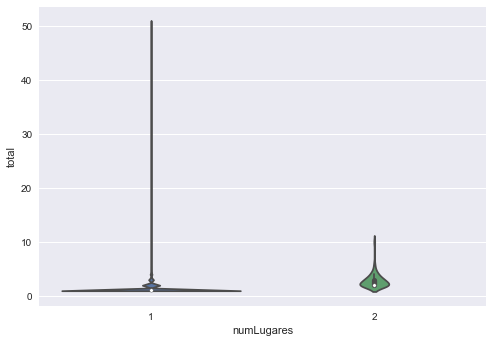

In [174]:
sns.violinplot(x="numLugares", y="total", data=parejasLugares)
plt.show()

# <font color = "#8A0868">Analisis Top Parejas por lugar</font>

## <font color='#DF3A01'> Aeropuerto </font>

In [108]:
top5Aero = aeropuerto["dataframe"]
top5Aero = top5Aero.sort_values("aeropuertoPeso", ascending = False).head(5)
top5Aero

,Mac1,Mac_usr1,Mac2,Mac_usr2,aeropuertoPeso
0,426,2C:D0:5A:72:6D:AA,638,90:94:E4:0A:4B:E6,47
3422,426,2C:D0:5A:72:6D:AA,149,D0:92:9E:0F:27:14,31
208588,697,18:3A:2D:FC:19:96,113,1C:B0:94:75:B9:A9,30
209203,113,1C:B0:94:75:B9:A9,426,2C:D0:5A:72:6D:AA,29
27484,149,D0:92:9E:0F:27:14,320,D8:EB:97:23:BE:30,29


In [109]:
mac1 = list(top5Aero["Mac1"])
mac2 = list(top5Aero["Mac2"])

In [162]:
def analisisConexiones(dataframe):
    dataframe2 = dataframe.groupby("fecha").size().rename("conexiones").reset_index()
    promedio = sum(dataframe2["conexiones"]) / len(dataframe2)
    #print(dataframe2)
    dataframe3 = dataframe.groupby("weekday").size().rename("conexiones").reset_index()
    #print(dataframe3)
    maximo = max(list(dataframe3["conexiones"]))
    dias = dataframe3[dataframe3["conexiones"] == maximo]
    return promedio, (list(dias["weekday"]), maximo)

In [172]:
print("Analisis Top 5 Parejas del Aeropuerto:")
for i in range(5):
    mac_usr1 = nodos["Mac"][mac1[i]]
    mac_usr2 = nodos["Mac"][mac2[i]]
    print("\n   - Puesto#", i+1, "->", mac_usr1, "con", mac_usr2)
    print("       Analisis", mac_usr1, "                       Analisis", mac_usr2)
    aux1 = datos[datos["mac_usr"] == mac_usr1]
    aux2 = datos[datos["mac_usr"] == mac_usr2]
    aux1 = aux1[aux1["localizacion"] == "Aeropuerto"]
    aux2 = aux2[aux2["localizacion"] == "Aeropuerto"]
    promedio1, dias1= analisisConexiones(aux1)
    promedio2, dias2 = analisisConexiones(aux2)
    promedio1 = int(round(promedio1))
    promedio2 = int(round(promedio2))
    print(("          + Num de Conexiones: " + str(len(aux1))).ljust(50, " "), end = "")
    print(("          + Num de Conexiones: " + str(len(aux2))))
    print(("          + Promedio de Conexiones(dia): " + str(promedio1)).ljust(50, " "), end = "")
    print(("          + Promedio de Conexiones(dia): " + str(promedio2)))
    print("          + Promedio de Conexiones(dia): " ,dias1, end = "")
    print("        + Promedio de Conexiones(dia): ", dias2)

Analisis Top 5 Parejas del Aeropuerto:

   - Puesto# 1 -> 2C:D0:5A:72:6D:AA con 90:94:E4:0A:4B:E6
       Analisis 2C:D0:5A:72:6D:AA                        Analisis 90:94:E4:0A:4B:E6
          + Num de Conexiones: 1112                         + Num de Conexiones: 1017
          + Promedio de Conexiones(dia): 13                 + Promedio de Conexiones(dia): 7
          + Promedio de Conexiones(dia):  ([4], 197)        + Promedio de Conexiones(dia):  ([0], 162)

   - Puesto# 2 -> 2C:D0:5A:72:6D:AA con D0:92:9E:0F:27:14
       Analisis 2C:D0:5A:72:6D:AA                        Analisis D0:92:9E:0F:27:14
          + Num de Conexiones: 1112                         + Num de Conexiones: 785
          + Promedio de Conexiones(dia): 13                 + Promedio de Conexiones(dia): 15
          + Promedio de Conexiones(dia):  ([4], 197)        + Promedio de Conexiones(dia):  ([3], 150)

   - Puesto# 3 -> 18:3A:2D:FC:19:96 con 1C:B0:94:75:B9:A9
       Analisis 18:3A:2D:FC:19:96                   